In [17]:
import cv2

# 8 Categorias
- "Textual": ["Text", "Text Button", "Number Stepper"] + list(text_buttons.keys()),
- "Media": ["Image", "Video", "Background Image", "Advertisement"],
- "Inputs": ["Input", "Checkbox", "Radio Button", "Date Picker", "On/Off Switch", "Slider"],
- "Navigation": ["Drawer", "Toolbar", "Bottom Navigation", "Multi-Tab", "Pager Indicator"],
- "Containers": ["Card", "Modal", "Button Bar"],
- "Other UI Elements": ["Web View", "List Item", "Map View"],
- "Icon": list(icons.keys())

In [18]:
import json

# --- Rutas a los archivos ---
component_path = "legend/component_legend.json"
textbutton_path = "legend/textButton_legend.json"
icon_path = "legend/icon_legend.json"

# --- Cargar archivos ---
with open(component_path, "r") as f:
    components = json.load(f)

with open(textbutton_path, "r") as f:
    text_buttons = json.load(f)

with open(icon_path, "r") as f:
    icons = json.load(f)

# --- Grupos definidos ---
groups = {
    "Textual": ["Text", "Text Button", "Number Stepper"] + list(text_buttons.keys()),
    "Media": ["Image", "Video", "Background Image", "Advertisement"],
    "Inputs": ["Input", "Checkbox", "Radio Button", "Date Picker", "On/Off Switch", "Slider"],
    "Navigation": ["Drawer", "Toolbar", "Bottom Navigation", "Multi-Tab", "Pager Indicator"],
    "Containers": ["Card", "Modal", "Button Bar"],
    "Other UI Elements": ["Web View", "List Item", "Map View"],
    "Icon": list(icons.keys())
}

# --- Recorrer y agrupar los colores ---
group_colors = {}

for group, class_list in groups.items():
    rgb_list = []

    for cls in class_list:
        if cls in components:
            rgb_list.append(components[cls]["rgb"])
        elif cls in text_buttons:
            rgb_list.append(text_buttons[cls]["rgb"])
        elif cls in icons:
            rgb_list.append(icons[cls]["rgb"])

    group_colors[group] = rgb_list

# --- Guardar como JSON ---
with open("final_legend.json", "w") as f:
    json.dump(group_colors, f, indent=2)

print("Archivo final_legend.json generado correctamente.")


Archivo final_legend.json generado correctamente.


Color inválido en categoría Inputs: [256, 139, 101]
Color inválido en categoría Inputs: [256, 184, 77]
Color inválido en categoría Navigation: [256, 242, 118]
Color inválido en categoría Containers: [0, 256, 205]
Color inválido en categoría Containers: [256, 206, 211]
Color inválido en categoría Other UI Elements: [256, 225, 179]


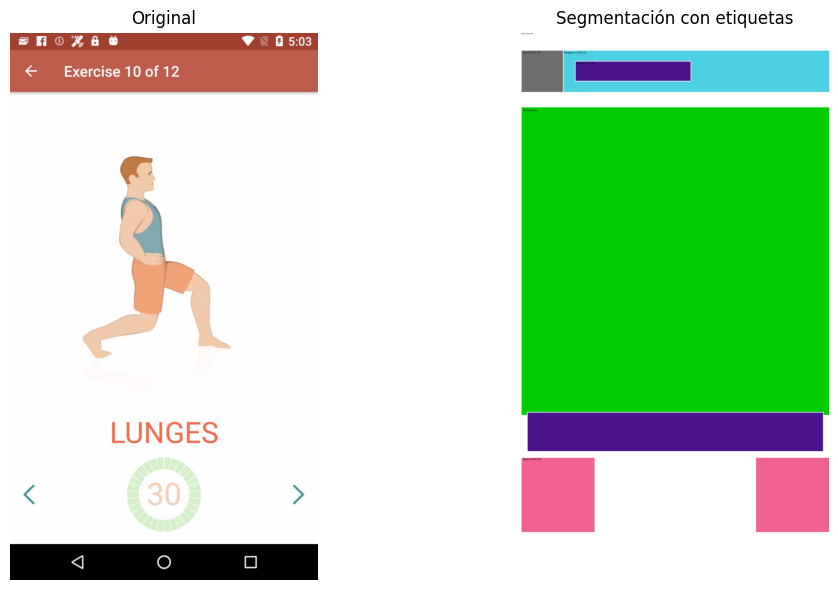

In [19]:
import json
from PIL import Image, ImageDraw, ImageFont
import numpy as np
import matplotlib.pyplot as plt

# --- Rutas de configuración ---
original_image_path = "input/combined/3.jpg"
segmented_image_path = "target/semantic_annotations/3.png"
legend_path = "legend/final_legend.json"

# --- Cargar leyenda y limpiar RGB inválidos ---
with open(legend_path, "r") as f:
    final_legend = json.load(f)

rgb_to_category = {}
for category, color_list in final_legend.items():
    for rgb in color_list:
        if all(0 <= val <= 255 for val in rgb):  # Verifica valores válidos
            rgb_to_category[tuple(rgb)] = category
        else:
            print(f"Color inválido en categoría {category}: {rgb}")

# --- Función para encontrar el color más cercano dentro de la tolerancia ---
def find_closest_category(rgb, legend_dict, tolerance=2):
    for color, category in legend_dict.items():
        try:
            if all(abs(int(c1) - int(c2)) <= tolerance for c1, c2 in zip(rgb, color)):
                return category
        except Exception as e:
            print(f"Error comparando {rgb} con {color}: {e}")
    return None

# --- Cargar imagen segmentada ---
img = Image.open(segmented_image_path).convert("RGB")
pixels = np.array(img)
height, width, _ = pixels.shape

# Crear imagen etiquetada
labeled_img = img.copy()
draw = ImageDraw.Draw(labeled_img)

# Fuente
try:
    font = ImageFont.truetype("arial.ttf", size=10)
except:
    font = ImageFont.load_default()

# Etiquetado evitando duplicados
labeled_positions = set()
seen_colors = set()

step = 10
for y in range(0, height, step):
    for x in range(0, width, step):
        rgb = tuple(pixels[y, x])
        if rgb not in seen_colors and (x // 20, y // 20) not in labeled_positions:
            category = find_closest_category(rgb, rgb_to_category, tolerance=5
                                             )
            if category:
                label = f"{category} {rgb[0]} {rgb[1]} {rgb[2]}"
            else:
                label = str(f"{rgb[0]} {rgb[1]} {rgb[2]}")
            draw.text((x, y), label, fill="black", font=font)
            seen_colors.add(rgb)
            labeled_positions.add((x // 20, y // 20))

# --- Mostrar imágenes lado a lado ---
original_img = Image.open(original_image_path).convert("RGB")

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(original_img)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Segmentación con etiquetas")
plt.imshow(labeled_img)
plt.axis("off")

# Guardar imagen etiquetada
labeled_img.save("annotated_segmented_image.png")

plt.tight_layout()
plt.show()


# 2 categorias

- Textual
- No Textual

In [20]:
import json

# --- Rutas a los archivos ---
component_path = "legend/component_legend.json"
textbutton_path = "legend/textButton_legend.json"
icon_path = "legend/icon_legend.json"

# --- Cargar archivos ---
with open(component_path, "r") as f:
    components = json.load(f)

with open(textbutton_path, "r") as f:
    text_buttons = json.load(f)

with open(icon_path, "r") as f:
    icons = json.load(f)

# --- Grupos definidos para dos clasificaciones: Texto y No Texto ---
groups = {
    "Texto": ["Text", "Text Button", "Number Stepper"] + list(text_buttons.keys()),
    "No Texto": ["Image", "Video", "Background Image", "Advertisement", 
                 "Input", "Checkbox", "Radio Button", "Date Picker", 
                 "On/Off Switch", "Slider", "Drawer", "Toolbar", "Bottom Navigation", 
                 "Multi-Tab", "Pager Indicator", "Card", "Modal", "Button Bar", 
                 "Web View", "List Item", "Map View"] + list(icons.keys())
}

# --- Recorrer y agrupar los colores ---
group_colors = {}

for group, class_list in groups.items():
    rgb_list = []

    for cls in class_list:
        if cls in components:
            rgb_list.append(components[cls]["rgb"])
        elif cls in text_buttons:
            rgb_list.append(text_buttons[cls]["rgb"])
        elif cls in icons:
            rgb_list.append(icons[cls]["rgb"])

    group_colors[group] = rgb_list

# --- Guardar como JSON ---
with open("legend/final_legend_text.json", "w") as f:
    json.dump(group_colors, f, indent=2)

print("Archivo final_legend.json generado correctamente.")


Archivo final_legend.json generado correctamente.


# 1 Categoria
- Texto

In [21]:
import json

# --- Rutas a los archivos ---
component_path = "legend/component_legend.json"
textbutton_path = "legend/textButton_legend.json"
icon_path = "legend/icon_legend.json"

# --- Cargar archivos ---
with open(component_path, "r") as f:
    components = json.load(f)

with open(textbutton_path, "r") as f:
    text_buttons = json.load(f)

with open(icon_path, "r") as f:
    icons = json.load(f)

# --- Grupos definidos para dos clasificaciones: Texto y No Texto ---
groups = {
    "Texto": ["Text", "Text Button", "Number Stepper"] + list(text_buttons.keys())
}

# --- Recorrer y agrupar los colores ---
group_colors = {}

for group, class_list in groups.items():
    rgb_list = []

    for cls in class_list:
        if cls in components:
            rgb_list.append(components[cls]["rgb"])
        elif cls in text_buttons:
            rgb_list.append(text_buttons[cls]["rgb"])
        elif cls in icons:
            rgb_list.append(icons[cls]["rgb"])

    group_colors[group] = rgb_list

# --- Guardar como JSON ---
with open("legend/final_legend_only_text.json", "w") as f:
    json.dump(group_colors, f, indent=2)

print("Archivo final_legend.json generado correctamente.")


Archivo final_legend.json generado correctamente.


# Pruebas

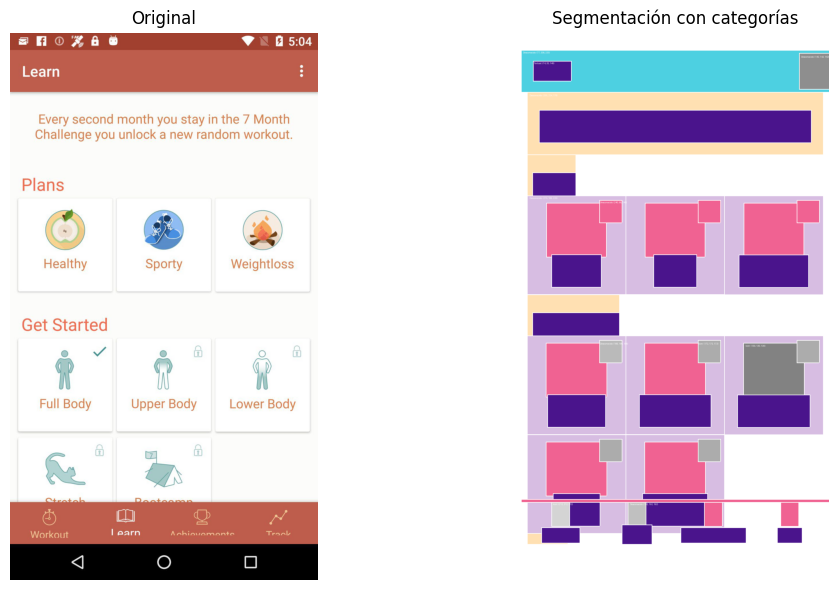

In [22]:
import json
from PIL import Image, ImageDraw, ImageFont
import numpy as np
import matplotlib.pyplot as plt

# --- Configuración ---
original_image_path = "input/combined/10.jpg"
image_path = "target/semantic_annotations/10.png"
legend_path = "legend/final_legend.json"  # El archivo JSON con los colores y categorías
tolerance = 1  # Umbral de tolerancia para la búsqueda de la categoría más cercana

# --- Cargar el JSON con las categorías y colores ---
with open(legend_path, "r") as f:
    category_colors = json.load(f)

# Convertimos el JSON a un formato de RGB -> categoría
rgb_to_category = {}
for category, color_list in category_colors.items():
    for rgb in color_list:
        rgb_to_category[tuple(rgb)] = category

# Función para calcular la distancia euclidiana entre dos colores
def calculate_color_distance(c1, c2):
    return np.sqrt(np.sum((np.array(c1) - np.array(c2)) ** 2))

# Función para encontrar la categoría más cercana dado un color y un umbral
def find_closest_category(rgb, legend_dict, tolerance=20):
    closest_category = None
    min_distance = float('inf')

    for color, category in legend_dict.items():
        distance = calculate_color_distance(rgb, color)
        if distance < min_distance and distance <= tolerance:
            min_distance = distance
            closest_category = category

    return closest_category

# --- Cargar la imagen segmentada ---
img = Image.open(image_path).convert("RGB")
pixels = np.array(img)
height, width, _ = pixels.shape

# Crear una copia de la imagen para dibujar
labeled_img = img.copy()
draw = ImageDraw.Draw(labeled_img)

# Fuente para texto
try:
    font = ImageFont.truetype("arial.ttf", size=10)
except:
    font = ImageFont.load_default()

# Evitar repetir etiquetas
labeled_positions = set()
labeled_colors = set()  # Mantener un conjunto de colores ya etiquetados

# Recorrer la imagen y etiquetar
step = 10
for y in range(0, height, step):
    for x in range(0, width, step):
        rgb = tuple(pixels[y, x])

        # Verificar si el color ya ha sido etiquetado en esta región
        if rgb not in labeled_colors:
            # Buscar la categoría más cercana utilizando la función de umbral
            category = find_closest_category(rgb, rgb_to_category, tolerance)

            # Etiquetar solo si se ha encontrado una categoría
            if category:
                # Evitar superponer el texto en la misma posición
                if (x // 20, y // 20) not in labeled_positions:
                    draw.text((x, y), f"{category}: ({rgb[0]}, {rgb[1]}, {rgb[2]}) ", fill="white", font=font)
                    labeled_positions.add((x // 20, y // 20))

                # Añadir el color al conjunto de colores etiquetados
                labeled_colors.add(rgb)
            else:
                # Si no se encuentra categoría, etiquetar como "Desconocido"
                if (x // 20, y // 20) not in labeled_positions:
                    draw.text((x, y), f"Desconocido: ({rgb[0]}, {rgb[1]}, {rgb[2]}) ", fill="white", font=font)
                    labeled_positions.add((x // 20, y // 20))
                labeled_colors.add(rgb)

# Mostrar imágenes con matplotlib
original_img = Image.open(original_image_path).convert("RGB")

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original")
original_img.save("original_image_.png")
plt.imshow(original_img)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Segmentación con categorías")
plt.imshow(labeled_img)

labeled_img.save("original_image_.png")
plt.axis("off")

# Guardar la imagen etiquetada
labeled_img.save("annotated_segmented_image.png")

plt.tight_layout()
plt.show()


# CREAR NUEVO DATASET

In [23]:
import json
import os
import numpy as np
from PIL import Image

def build_tolerant_map(legend_path, tolerance=1):
    """
    Carga el legend JSON y construye un diccionario tolerant_map
    que asocia cada color (R,G,B) dentro de ±tolerance al nombre de su categoría.
    Devuelve (tolerant_map, categories).
    """
    with open(legend_path, "r") as f:
        legend = json.load(f)

    tolerant_map = {}
    for category, color_list in legend.items():
        for base in color_list:
            r0, g0, b0 = base
            for dr in range(-tolerance, tolerance+1):
                for dg in range(-tolerance, tolerance+1):
                    for db in range(-tolerance, tolerance+1):
                        r = min(255, max(0, r0 + dr))
                        g = min(255, max(0, g0 + dg))
                        b = min(255, max(0, b0 + db))
                        tolerant_map[(r, g, b)] = category

    categories = list(legend.keys())
    return tolerant_map, categories



def generate_multichannel_mask(image_number,
                               tolerant_map,
                               categories,
                               output_dir,
                               target_size=(288, 512),
                               save_png=False):
    image_path = f"target/semantic_annotations/{image_number}.png"
    img = Image.open(image_path).convert("RGB") \
             .resize(target_size, resample=Image.NEAREST)
    pixels = np.array(img)
    h, w, _ = pixels.shape

    num_cats = len(categories)
    mask = np.zeros((h, w, num_cats), dtype=np.uint8)

    for y in range(h):
        for x in range(w):
            col = tuple(pixels[y, x])
            cat = tolerant_map.get(col)
            if cat is not None:
                idx = categories.index(cat)
                mask[y, x, idx] = 1

    os.makedirs(output_dir, exist_ok=True)
    np.save(os.path.join(output_dir, f"{image_number}.npy"), mask)

    if save_png:
        if num_cats == 1:
            out = (mask[:, :, 0] * 255).astype(np.uint8)
            Image.fromarray(out).save(os.path.join(output_dir, f"{image_number}.png"))
        else:
            for idx, cat in enumerate(categories):
                out = (mask[:, :, idx] * 255).astype(np.uint8)
                Image.fromarray(out).save(os.path.join(output_dir, f"{image_number}_{cat}.png"))


In [24]:
def generate_multichannel_mask_from_image(NUMBER):
    # --- Prepara el mapa una sola vez ---
    legend_path = "legend/final_legend_only_text.json"
    tolerance = 1
    output_dir = "target/binary_masks/"
    tolerant_map, categories = build_tolerant_map(legend_path, tolerance)

    # --- Contadores ---
    success_count = 0
    not_found_count = 0
    other_error_count = 0

    # --- Procesamiento de imágenes ---
    for i in range(NUMBER):
        save_png = (i % 100 == 0)
        try:
            if save_png:
                print(f"Procesando imagen {i}...")
            generate_multichannel_mask(
                image_number=i,
                tolerant_map=tolerant_map,
                categories=categories,
                output_dir=output_dir,
                save_png=save_png
            )
            success_count += 1
        except FileNotFoundError:
            not_found_count += 1
        except Exception as e:
            other_error_count += 1
            print(f"[{i}] Error inesperado: {e}")

    # --- Estadísticas finales ---
    print(f"Éxitos: {success_count}")
    print(f"No encontrados: {not_found_count}")
    print(f"Otros errores: {other_error_count}")

# CREACION DATASET

In [25]:
generate_multichannel_mask_from_image(10000)

Procesando imagen 0...


KeyboardInterrupt: 

## Visualización de la máscara

In [29]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def display_triplet(image_number):
    # Rutas
    orig_path = f"input/combined/{image_number}.jpg"
    sem_path  = f"target/semantic_annotations/{image_number}.png"
    npy_path  = f"target/binary_masks/{image_number}.npy"

    # Cargar imágenes
    orig_img = Image.open(orig_path).convert("RGB")
    sem_img  = Image.open(sem_path).convert("RGB")

    # Cargar máscara binaria y convertir a imagen (0→negro, 1→blanco)
    mask = np.load(npy_path)  # shape (H, W) o (H, W, C)
    # Si multi-canal, colapsamos sumando o eligiendo canal 0
    if mask.ndim == 3:
        bin_mask = (mask.max(axis=-1) * 255).astype(np.uint8)
    else:
        bin_mask = (mask * 255).astype(np.uint8)
    mask_img = Image.fromarray(bin_mask, mode="L")

    # Mostrar lado a lado
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    image1 = orig_img.copy()
    axes[0].imshow(orig_img)
    axes[0].set_title("Original")
    axes[0].axis("off")

    image2 = sem_img.copy()
    axes[1].imshow(sem_img)
    axes[1].set_title("Segmentación Semántica")
    axes[1].axis("off")

    image3 = mask_img.copy()
    axes[2].imshow(mask_img, cmap="gray")
    axes[2].set_title("Máscara Texto/No Texto")
    axes[2].axis("off")

    plt.tight_layout()
    plt.show()

    return image1, image2, image3


# EJEMPLO SALIDA

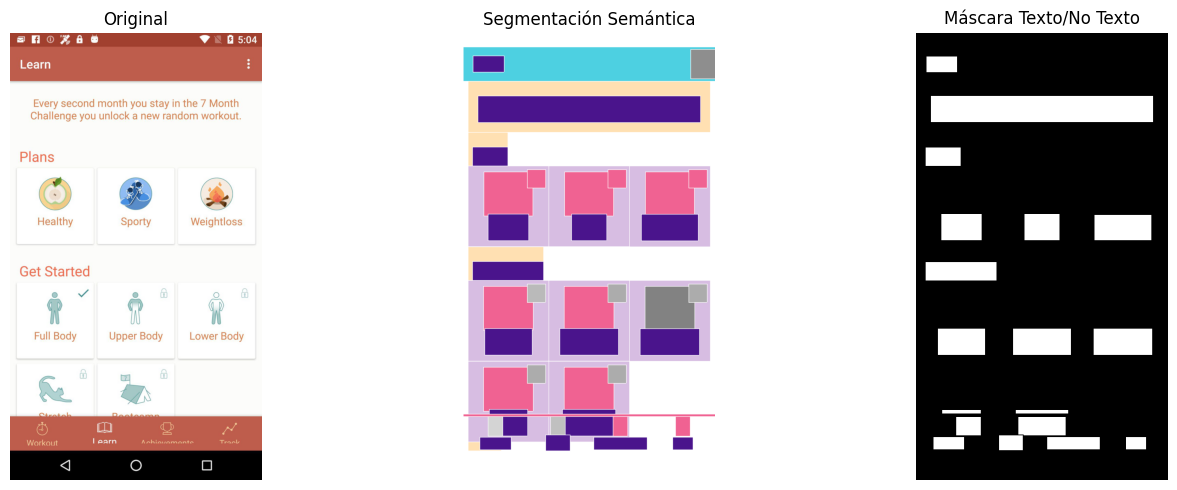

In [31]:
image1, image2, image3 = display_triplet(10)

image1.save("flow/1.png")
image2.save("flow/2.png")
image3.save("flow/3.png")
